# Linear Regression Theory Intro

In this lab, we cover the basics of linear regression, with examples of Python implementation in [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and [Statsmodels](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) on the [Anscombe dataset](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) and [FRED House Price Index](https://fred.stlouisfed.org/series/USSTHPI) data. This is a primer for the `linear-regression-code-intro` module.

## Objectives:
Students will be able to:
1. Apply Linear Regression to the framework taught in the Machine Learning intro lesson.
2. Interpret the coefficients of a linear regression model.
3. Fit linear regression models using either scikit-learn or statsmodels.
4. Predict out-of-sample using a model.
5. Recognize and explain limits of models:
  * Models do not determine causation.
  * Models cannot substitute for understanding data.

In [2]:
#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline
%config InlineBackend.figure_formats = ['retina']

#######################
#       imports       #
#######################
import pandas as pd
import seaborn as sns
# import sklearn

sns.set_style("whitegrid", {"font.family": ["serif"]})
sns.set_context("talk") # talk context is good for RISE presentations

Populating the interactive namespace from numpy and matplotlib


In [3]:
# load anscombe data
anscombe = pd.read_csv('./data/anscombe.csv')
anscombe.head(15)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


The anscombe data includes four datasets that are useful for instruction. Right now, we'll focus on dataset I.

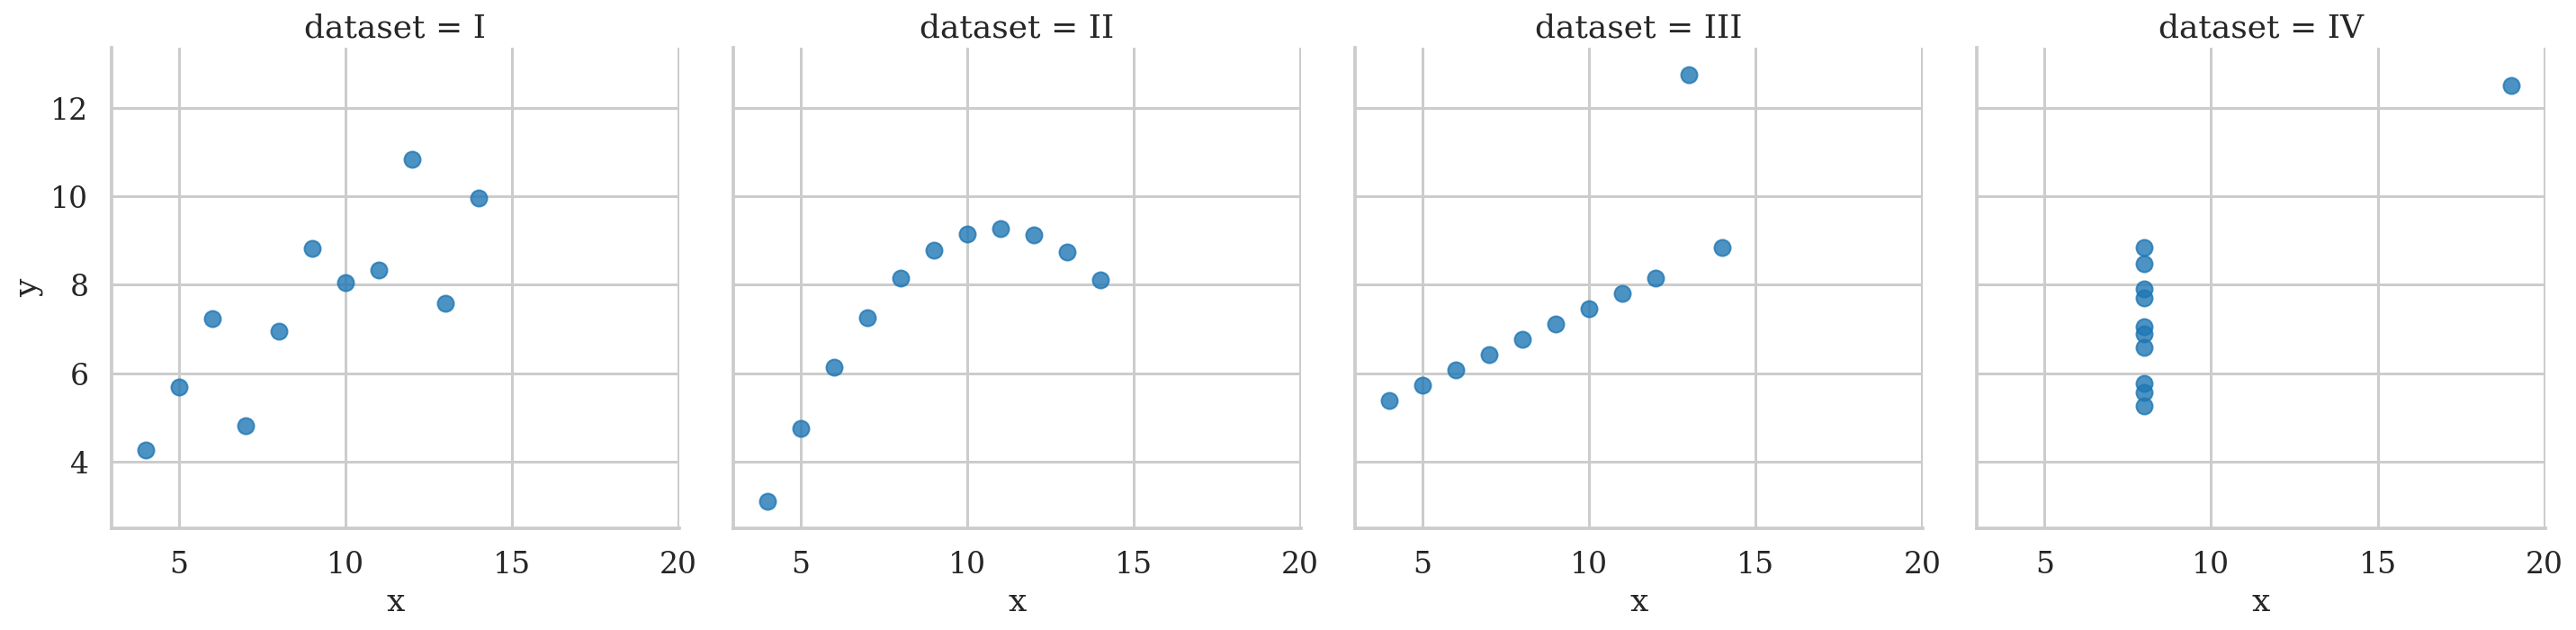

In [5]:
# plot with matplotlib
sns.lmplot(x="x", y="y", col="dataset", fit_reg=False,
           ci=None, data=anscombe, height=5)

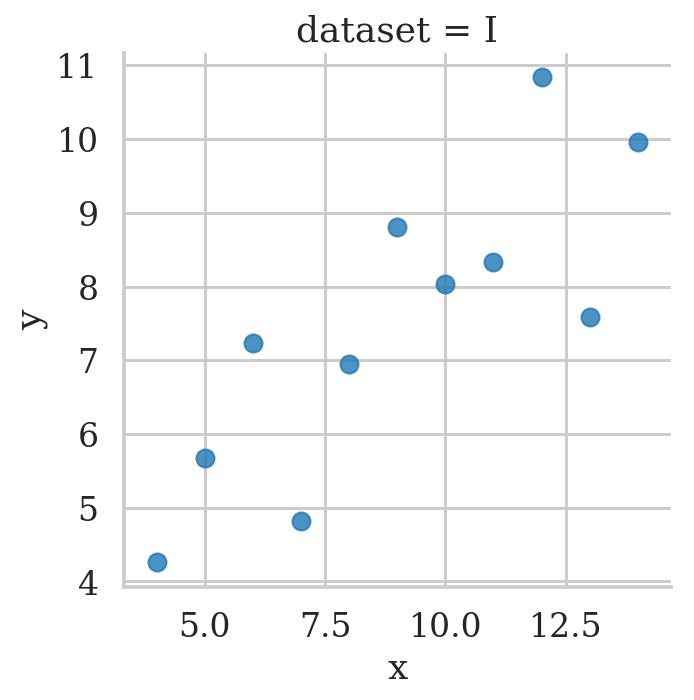

In [7]:
sns.lmplot(
    x="x", y="y", ci=None, fit_reg=False, col="dataset", data=anscombe.query("dataset=='I'"), height=5)

We note a pattern - a correlation - between `x` and `y` that can be used to build a linear model. As x increases, y tends to increase by a fixed amnount. In its simplest sense, a linear model is a straight line relationship between a:
 - feature and target
 - independent variable and dependent variable
 - predictor and response

All these terms are interchangable and come from different sub-domains of science, but data science tends to use _feature/target_ naming.

Using seaborn, we can quickly plot our data along with a regression model.

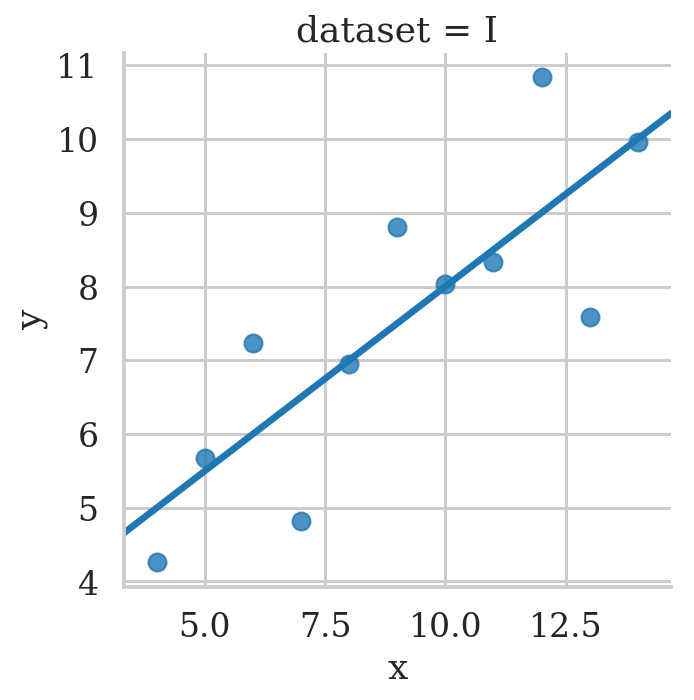

In [8]:
# plot with visualized linear model
sns.lmplot(x="x", y="y", ci=None, col="dataset", data=anscombe.query("dataset=='I'"))

We see the line crosses (6,6) and (10,8), giving us a slope of 2/4: there is a change in `y` of .5 for every change of 1 in `x`. We could write the equation for this line as $y = .5x + 3$. Is this line a good fit for our data?

Okay, that's what our finished product looks like. But how does it work? How does something find the best line for a given dataset?

First some math terms we'll use: 
- $x$: input features of data
- $y$: target value of data
- $\hat{y}$: predicted output from the model

![](https://upload.wikimedia.org/wikipedia/commons/e/ed/Residuals_for_Linear_Regression_Fit.png)

We'll start by quantifying how well a line fits a dataset. On the figure, the dots are the points in our dataset and the red line is what we want to evaluate. 

The distance from each point to the line is called the error. These errors are also called residuals: they are the difference between observed $y$ and predicted $\widehat{y}$.

![](https://upload.wikimedia.org/wikipedia/commons/e/ed/Residuals_for_Linear_Regression_Fit.png)

Ordinary Least Squares is an approach to fitting a model/line that seeks to minimize the sum of squared errors. 

That means OLS is taking each error, squaring it, and then trying to minimize that length. One consenquence is that the bottom and top points in the figure contribute greatly to our model's error and have strong influence. Outliers are especially dangerous!

We can define this mathematically too.

OLS Cost Function:

$$\frac{1}{2m} \sum _{i=1}^m \left(y_i - \hat{y}_i\right)^2$$

> Note: one key reason to use squared distances is that it creates a convex optimization problem, which has only one solution and is very fast to solve!

# Modeling with sklearn

Let's start by training a model and then we'll talk about what it does.

In [ ]:
# import model and fit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression  

# grab the x column and y column

X1 = anscombe.query("dataset=='I'").loc[:,'x'].values.reshape(-1,1)
y1 = anscombe.query("dataset=='I'").loc[:,'y']

linreg_model = LinearRegression()
linreg_model.fit(X1, y1)

There! That's all there is to training a model in sci-kit learn.

Now we can use the stored model object (`linreg_model`) to find coefficients.

In [ ]:
# show coefficients
linreg_model.coef_

# this should match our 2/4 spot-check on the slope!

And the intercept.

In [ ]:
# get y-intercept
linreg_model.intercept_

And we can make predictions on new data. Let's try $x=0$

In [ ]:
# use our fitted model to predict y when x=0

linreg_model.predict([[0]])

# yes, we get our intercept!

In Linear Regression, the model learns a set of parameters, $\beta$. $\beta$ is a **vector** of parameters, which includes $\beta_0$, $\beta_1$, $\beta_2$, etc.

These are combined using the formula
$$\hat{y} = \beta^Tx\ .$$ 
We can expand the matrix multiplication to get
$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \beta_4x_4 ...\ .$$

Here, $x_1$, $x_2$, etc. are the features or columns in our data.

$\beta_0$ is our intercept, and the other betas correspond, left to right, to our features. We only have one in this case, but next we'll look at a dataset with more features!

$\epsilon$ stands for the error. Our model starts by assuming that it can't be perfectly right and that each point of data might have some error. This error is assumed to be generated from a Gaussian (aka Normal) distribution independently for each point.

# Modeling Housing Data with Statsmodels

You've just seen how to use `sklearn` to fit a linear regression model. Now let's look at a different tool, `statsmodels`. You'll see more on this later but for now, both methods are equally good. 
- `sklearn` is designed more for machine learning.
- `statsmodels` is designed more for statisticians. 

In [ ]:
import statsmodels.api as sm

# housing price index by date
housing_price_index = pd.read_csv('data/monthly-hpi.csv')

# inflation, S&P500 and interest rates by date
shiller = pd.read_csv('data/shiller.csv')

# GDP by date
gross_domestic_product = pd.read_csv('data/gdp.csv')

Our data comes in different time blocks, so we can `pandas` merge on date to match up our data.

In [ ]:
# merge to single dataframe
housing_df = shiller.merge(gross_domestic_product, on='date').merge(housing_price_index, on='date')

In [ ]:
# scope out our data
housing_df.head()

In [ ]:
# describe it
housing_df.describe()

Per the [FHFA site](https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index.aspx), House Price Index (HPI) is a broad measure of the movement of single-family house prices. The HPI is a weighted, repeat-sales index, meaning that it measures average price changes in repeat sales or refinancings on the same properties. This information is obtained by reviewing repeat mortgage transactions on single-family properties whose mortgages have been purchased or securitized by Fannie Mae or Freddie Mac since January 1975.

>The prices are normalized to 1980:Q1 = 100.

In [ ]:
# slice data into features and target
X = housing_df.drop(columns=["housing_price_index", "date"]).astype(float)
y = housing_df.loc[:,"housing_price_index"].astype(float)

In [ ]:
# fit model with target as housing price index
housing_model = sm.OLS(y, X, data=housing_df)

results = housing_model.fit()

# summarize our model
results.summary()

![](img/results.png)


There's a lot going on here! We'll break the summary table down in a future lesson.

For now, let's find the coefficients in the second table:

- `sp500` has a coefficient of 0.0266
- This means when the S&P 500 goes up by one dollar, the HPI goes up by 0.0266

- Does this mean the stock market **causes** an increase in housing prices??

- NOT necessarily! There could be something we aren't measuring affecting both S&P and HPI, causality could be going the other direction, or it could be a much more complicated system.

![](img/results.png)

Are there any coefficients that surprise you?

Possibilities:
- Interest rates: Higher interest rates should make it more difficult to purchase a house, but interest rates are positively related to HPI.
- Labor force participation, GDP, Price index: all of these would seem to increase HPI but are negatively related.

### Are Models Everything We Need?

In [ ]:
# describe first set
anscombe.query("dataset=='I'").describe()

In [ ]:
# STUDENTS: describe second, third, and fourth sets

## What do you notice?

Incredibly, the mean, variance (deviation squared), and other key metrics are identical! This is the famous Anscombe dataset, created to show that it takes more than a quick summary to understand our data well.

In [ ]:
# STUDENTS: use statsmodels or sklearn to fit linear models to these datasets and compare



<img src=data/anscombe.jpg style="float:right; max-width:50%">

Even more incredibly, the models that best fit our data according to OLS is the same for all our datasets!

We note in this Anscombe exercise that statistics aren't enough for us to understand our data. Even models don't give us full insight; we must combine these approaches with visualization of our data!

With the help of seaborn we can quickly plot each dataset along with its linear regression fit to confirm that these wildly different datasets do infact lead to the same predictions.

In [ ]:
sns.lmplot(x="x", y="y", col="dataset", col_wrap=2, data=anscombe, ci=None)

<img border="0" src="https://blog.revolutionanalytics.com/downloads/DataSaurus%20Dozen.gif" title="DataSaurus Dozen" width="500">

Another even more extreme example of this: the [Dinosaur Dozen](https://blog.revolutionanalytics.com/2017/05/the-datasaurus-dozen.html). 12 plots including a T-Rex that have the same mean, std, and correlation.

What lesson can we learn from the Anscome Dataset and the Dinosaur Dozen?

Models are very useful tools but they can never be a substitute for understanding (and at minimum, **plotting**) your data.